In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyam
import seaborn
from scipy.optimize import fsolve, root, least_squares
import sklearn.decomposition
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

In [2]:
version_str = "v5"
output_dir = f"../output/{version_str}/fair/"
date_str = "2022-03-15"
temps = pd.read_csv("{}fair_output_quantiles_{}_{}.csv".format(output_dir, date_str, version_str))
fair_df = pd.read_csv('{}fair_output_raw_{}_{}.csv'.format(output_dir, date_str, version_str), index_col=0)
fair_df

,scenario,1765,1766,1767,1768,1769,1770,1771,1772,1773,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.002751,0.005241,0.007940,0.012981,0.018950,0.025513,0.029475,0.030094,0.030464,...,0.252816,0.250176,0.247540,0.244910,0.242285,0.239665,0.237050,0.234440,0.231835,0.229236
1,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.003864,0.007122,0.010898,0.020395,0.031454,0.043210,0.047838,0.043892,0.041129,...,0.241531,0.237814,0.234108,0.230412,0.226728,0.223054,0.219392,0.215740,0.212100,0.208471
2,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.015027,0.025776,0.035114,0.046443,0.057942,0.069351,0.076312,0.077298,0.078463,...,0.351020,0.347929,0.344846,0.341769,0.338698,0.335635,0.332578,0.329528,0.326485,0.323449
3,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.003456,0.005529,0.007669,0.012386,0.017598,0.022956,0.024841,0.023868,0.022721,...,0.336686,0.333530,0.330380,0.327237,0.324100,0.320971,0.317848,0.314733,0.311624,0.308523
4,scen_2030fact0.12_nz2040_ov-10000_meth0.1,0.005983,0.010959,0.015759,0.022375,0.029606,0.037201,0.042308,0.042533,0.043916,...,0.232094,0.230138,0.228189,0.226246,0.224311,0.222383,0.220462,0.218548,0.216641,0.214741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,scen_2030fact1.32_nz2200_ov0_meth0.9,-0.002594,-0.003396,-0.002763,0.003357,0.011730,0.021526,0.026191,0.026982,0.025351,...,3.123520,3.123723,3.123927,3.124133,3.124340,3.124548,3.124757,3.124967,3.125178,3.125390
35996,scen_2030fact1.32_nz2200_ov0_meth0.9,0.002257,0.004585,0.007460,0.014016,0.022098,0.031179,0.036468,0.038749,0.039038,...,4.245763,4.247253,4.248727,4.250186,4.251629,4.253058,4.254471,4.255869,4.257253,4.258622
35997,scen_2030fact1.32_nz2200_ov0_meth0.9,0.005314,0.009809,0.014304,0.021737,0.030238,0.039397,0.044933,0.045437,0.045969,...,5.468724,5.471089,5.473428,5.475741,5.478030,5.480293,5.482531,5.484745,5.486934,5.489100
35998,scen_2030fact1.32_nz2200_ov0_meth0.9,0.001698,0.003474,0.005696,0.010695,0.016892,0.023899,0.028145,0.029651,0.030138,...,4.288641,4.292456,4.296250,4.300022,4.303772,4.307502,4.311209,4.314896,4.318562,4.322206


In [3]:
temps_py = pyam.IamDataFrame(temps)
temps_py.data

,model,scenario,region,variable,unit,year,climate_model,quantile,value
0,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.10,0.931664
1,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.33,0.948613
2,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.50,0.958960
3,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.66,0.970343
4,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.1,World,Surface Temperature,K,2010,FaIRv1.6.4,0.90,0.995397
...,...,...,...,...,...,...,...,...,...
2182495,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,2300,FaIRv1.6.4,0.10,2.904312
2182496,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,2300,FaIRv1.6.4,0.33,3.604036
2182497,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,2300,FaIRv1.6.4,0.50,3.920766
2182498,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.9,World,Surface Temperature,K,2300,FaIRv1.6.4,0.66,4.118661


pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.plotting - INFO: >=13 labels, not applying legend
pyam.plotting - INFO: >=13 labels, not applying legend


<AxesSubplot:title={'center':'model: NameVanished - region: World - variable: Surface Temperature - climate_model: FaIRv1.6.4 - quantile: 0.66'}, xlabel='Year', ylabel='K'>

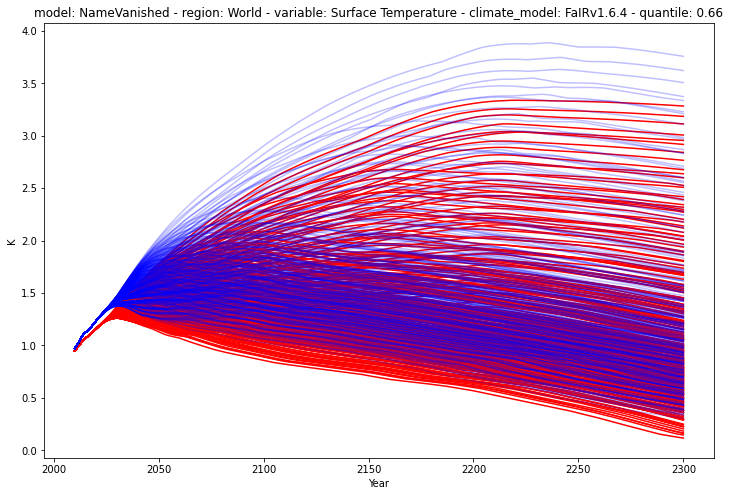

In [4]:
plt.figure(figsize=(12, 8))
ax=plt.subplot()
temps_py.filter(quantile=0.33, scenario="*10000*").plot(ax=ax, color="r")
temps_py.filter(quantile=0.66, scenario="*10000*").plot(ax=ax, color="b", alpha=0.25)

In [5]:
temps

,climate_model,model,region,scenario,unit,variable,quantile,2010,2011,2012,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.1,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.099868,0.096647,0.093437,0.090239,0.087053,0.083879,0.080717,0.077567,0.074429,0.071302
1,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.25,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.135194,0.132734,0.130283,0.127841,0.125408,0.122984,0.120374,0.117310,0.114259,0.111219
2,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.5,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.175823,0.173365,0.170916,0.168477,0.166046,0.163624,0.161211,0.158807,0.156412,0.154026
3,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.75,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.247033,0.244419,0.241771,0.238736,0.235823,0.233404,0.230993,0.228591,0.226198,0.223814
4,FaIRv1.6.4,NameVanished,World,scen_2030fact0.12_nz2040_ov-10000_meth0.9,K,Surface Temperature,0.1,0.931664,0.949297,0.967368,...,0.367415,0.364812,0.362219,0.359636,0.357062,0.354498,0.351943,0.349399,0.346864,0.344338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.1,K,Surface Temperature,0.9,0.995397,1.026791,1.063653,...,4.089028,4.092328,4.095611,4.098876,4.102123,4.105352,4.108563,4.111757,4.114933,4.118092
7496,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.25,K,Surface Temperature,0.9,0.995397,1.026791,1.063653,...,4.206433,4.209905,4.213358,4.216792,4.220209,4.223607,4.226986,4.230348,4.233691,4.237016
7497,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.5,K,Surface Temperature,0.9,0.995397,1.026791,1.063653,...,4.345389,4.349054,4.352701,4.356328,4.359936,4.363525,4.367095,4.370647,4.374179,4.377693
7498,FaIRv1.6.4,NameVanished,World,scen_2030fact1.32_nz2200_ov0_meth0.75,K,Surface Temperature,0.9,0.995397,1.026791,1.063653,...,4.438831,4.442622,4.446392,4.450143,4.453875,4.457587,4.461280,4.464954,4.468609,4.472244


In [ ]:
temps_90 = pyam.IamDataFrame(temps).filter(quantile=0.9).timeseries()
temps_50 = pyam.IamDataFrame(temps).filter(quantile=0.5).timeseries()
temps_10 = pyam.IamDataFrame(temps).filter(quantile=0.1).timeseries()
temps_33 = pyam.IamDataFrame(temps).filter(quantile=0.33).timeseries()
temps_66 = pyam.IamDataFrame(temps).filter(quantile=0.66).timeseries()
temps_90 = temps_90.reset_index(drop=True)
temps_50 = temps_50.reset_index(drop=True)
temps_10 = temps_10.reset_index(drop=True)
temps_33 = temps_33.reset_index(drop=True)
temps_66 = temps_66.reset_index(drop=True)
quantile_range = [0.10, 0.33, 0.50, 0.66, 0.90, "all"]
decomposers2 = {}
decomposers3 = {}
decomposers4 = {}
decomposers5 = {}
temp_data = {
    0.10: temps_10, 0.33: temps_33, 0.50: temps_50, 0.90:temps_90, 
    0.66: temps_66, "all": temps_py.timeseries().reset_index(drop=True)
}
for i in quantile_range:
    decomposers2[i] = sklearn.decomposition.PCA(2).fit(temp_data[i])
    decomposers3[i] = sklearn.decomposition.PCA(3).fit(temp_data[i])
    decomposers4[i] = sklearn.decomposition.PCA(4).fit(temp_data[i])
    decomposers5[i] = sklearn.decomposition.PCA(5).fit(temp_data[i])

In [ ]:
pcacols = ["PCA1", "PCA2", "PCA3", "PCA4", "PCA5"]
# Switch between on and off to study the impact of considering all quantiles
if (False):
    pcadf = pd.DataFrame(
        decomposers5[0.5].transform(temps_py.filter(quantile=0.5).timeseries()), 
        columns=pcacols,
        index=temps_py.filter(quantile=0.5).timeseries().index
    ).reset_index()
else:
    pcadf = pd.DataFrame(
        decomposers5["all"].transform(temps_py.timeseries()), 
        columns=pcacols,
        index=temps_py.timeseries().index
    ).reset_index()
pcadf = dec

In [ ]:
def decode_scen(df):
    df["factor2030"] = [float(x[1][:4]) for x in df["scenario"].str.split("2030fact")]
    df["nzdate"] = [int(x[1][:4]) for x in df["scenario"].str.split("_nz")]
    df["overshoot"] = [float(x[3][2:]) for x in df["scenario"].str.split("_")]
    df["methane"] = [float(x[4][4:]) for x in df["scenario"].str.split("_")]
    # The numerical stability of calculations is higher when variables are all of order 1
    df["nzreduced"] = df["nzdate"] / 100 - 20
    df["overshootreduced"] = df["overshoot"]/10000
    return df
pcadf = decode_scen(pcadf)
pcadf

In [ ]:
functional_cols = ["factor2030", "nzreduced", "overshootreduced", "methane"]
pcadf = pcadf.set_index("scenario", drop=True).loc[:, ["quantile"] + functional_cols + pcacols]
pcadf

In [ ]:
pca_train, pca_test, pca_res_train, pca_res_test = train_test_split(
    pcadf.loc[:, pcacols + ["quantile"]], pcadf.loc[:, functional_cols], test_size = 0.2, random_state = 4
)

In [ ]:
pca_res_train

# Attempt to map across different quantiles

In [ ]:
dif_quant_test = pca_test.copy()
dif_quant_test["quantile"] = 0.5

In [ ]:
pca_res_test

In [ ]:
# Compare correct value
regression = linear_model.LinearRegression()
poly_model = regression.fit(pca_train, pca_res_train)
score = poly_model.score(pca_test, pca_res_test)
score

In [ ]:
# With polynomial version of correct value
poly = PolynomialFeatures(degree=6)
poly_train = poly.fit_transform(pca_train)
poly_test = poly.fit_transform(pca_test)

In [ ]:
poly_model = regression.fit(poly_train, pca_res_train)
score = poly_model.score(poly_test, pca_res_test)
predicted = poly_model.predict(poly_test)
score

In [ ]:
# Much more accurate! Now compare to the different quantile values (no objective answer)
wrong_quant_pred = poly_model.predict(poly.fit_transform(dif_quant_test))

In [ ]:
plt.figure(figsize=(16, 8))
corcoefsq5 = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(pca_res_test.iloc[:, i]+0.05*np.random.rand(len(pca_res_test)), wrong_quant_pred [:, i], alpha=0.1)
    plt.title(titles[i])
    corcoefsq5.append(np.corrcoef(pca_res_test.iloc[:, i], wrong_quant_pred [:, i]))
corcoefsq5

In [ ]:
def calc_wrong_fraction(npa):
    # Encode link between column index and max/min reasonable values
    limits = {0: [0, 2], 1: [0.3, 3], 2: [-2, 0.1], 3: [0, 1]}
    wrong_fraction = pd.Series(index=range(npa.shape[1]), data = np.nan)
    for i in range(npa.shape[1]):
        wrong_fraction[i] = sum(
            (npa[:, i] > limits[i][1]) | (npa[:, i] < limits[i][0])
        ) / len(npa)
    all_wrong_fraction = sum(
        (npa[:, 0] > limits[0][1]) | (npa[:, 0] < limits[0][0]) |
        (npa[:, 1] > limits[1][1]) | (npa[:, 1] < limits[1][0]) |
        (npa[:, 2] > limits[2][1]) | (npa[:, 2] < limits[2][0]) |
        (npa[:, 3] > limits[3][1]) | (npa[:, 3] < limits[3][0]) 
    ) / len(npa)
    return (all_wrong_fraction, wrong_fraction)

In [ ]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(wrong_quant_pred)
print(all_wrong_fraction)
print(wrong_fraction)

In [ ]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(predicted)
print(all_wrong_fraction)
print(wrong_fraction)

## Attempt via resolution into PCA of the corresponding quantile
Unfortunately the accuracy of the single-quantile decomposition is poor

In [ ]:
temp_train = {}
temp_test = {}
temp_res_train = {}
temp_res_test = {}
quantiles = [0.1, 0.33, 0.5, 0.66, 0.9]
for quantile in quantiles + ["all"]:
    if quantile != "all":
        temp_quant = decode_scen(temps.loc[temps["quantile"]==quantile,:].copy())
    else:
        temp_quant = decode_scen(temps)
    temp_train[quantile], temp_test[quantile], temp_res_train[quantile], temp_res_test[quantile] = train_test_split(
        temp_quant.loc[:, temp_quant.columns[6:-6]], 
        temp_quant.loc[:, functional_cols], test_size = 0.2, random_state = 4
    )
    

In [ ]:
temp_train["all"]

In [ ]:
quant_to_inv = 0.66
poly_2 = PolynomialFeatures(degree=2)
temp_to_train = decomposers5[quant_to_inv].transform(temp_train[quant_to_inv].iloc[:, 1:])
temp_to_train = np.c_[temp_to_train, temp_train[quant_to_inv].loc[:, "quantile"].values]

temp_to_test = decomposers5[quant_to_inv].transform(temp_test[quant_to_inv].iloc[:, 1:])
temp_to_test = np.c_[temp_to_test, temp_test[quant_to_inv].loc[:, "quantile"].values]
poly_model = regression.fit(
    poly_2.fit_transform(temp_to_train), temp_res_train[quant_to_inv]
)
score = poly_model.score(
    poly_2.fit_transform(temp_to_test), temp_res_test[quant_to_inv]
)
score

In [ ]:
quant_to_inv = 0.5
temp_to_train = decomposers5[quant_to_inv].transform(temp_train[quant_to_inv].iloc[:, 1:])
temp_to_train = np.c_[temp_to_train, temp_train[quant_to_inv].loc[:, "quantile"].values]

temp_to_test = decomposers5[quant_to_inv].transform(temp_test[quant_to_inv].iloc[:, 1:])
temp_to_test = np.c_[temp_to_test, temp_test[quant_to_inv].loc[:, "quantile"].values]
poly_model = regression.fit(
    poly_2.fit_transform(temp_to_train), temp_res_train[quant_to_inv]
)
score = poly_model.score(
    poly_2.fit_transform(temp_to_test), temp_res_test[quant_to_inv]
)
score

In [ ]:
true_quant = 0.1
false_quant = quant_to_inv
assert true_quant != false_quant
wrong_quant_pcas = decomposers5[false_quant].transform(temp_test[true_quant].iloc[:, 1:])
wrong_quant_pcas = np.c_[wrong_quant_pcas, false_quant * np.ones((len(wrong_quant_pcas), 1))]
wrong_quant_results = poly_model.predict(poly_2.fit_transform(wrong_quant_pcas))

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
plt.plot(
    [int(x) for x in temp_test[true_quant].iloc[:15, 1:].columns], 
    temp_test[0.1].iloc[:15, 1:].T,
    linewidth=0.6
)
plt.plot(
    [int(x) for x in temp_test[true_quant].iloc[:15, 1:].columns],
    decomposers5[0.5].inverse_transform(
        decomposers5[0.5].transform(temp_test[0.1].iloc[:15, 1:])
    ).T,
    linestyle="-.",
)
plt.xlabel("Year")
plt.ylabel("Temperature (C)")

In [ ]:
plt.figure(figsize=(12, 8))
ax = plt.subplot()
for i in range(5):
    plt.plot(
        decomposers5[0.1].components_[i]
    )
    plt.plot(
        decomposers5["all"].components_[i],
        linestyle="-.",
    )

In [ ]:
plt.figure(figsize=(16, 8))
corcoefsq5 = []
titles = ["2030 emissions metric", "Net zero year metric", "Overshoot metric", "Methane metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(
        temp_res_test[quant_to_inv].iloc[:, i]+0.05*np.random.rand(len(wrong_quant_results)), 
        wrong_quant_results[:, i], alpha=0.1
    )
    plt.title(titles[i])
    #corcoefsq5.append(np.corrcoef(temp_res_test.iloc[:, i], wrong_quant_results[:, i]))
#corcoefsq5

In [ ]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(wrong_quant_results)
print(all_wrong_fraction)
print(wrong_fraction)

In [ ]:
# We can apply this to all other real quantiles too. 
false_quant = quant_to_inv
all_wrong = temps.loc[temps["quantile"]!=false_quant,:].copy()
assert true_quant != false_quant
wrong_quant_pcas = decomposers5[false_quant].transform(all_wrong.iloc[:, 7:-6])
wrong_quant_pcas = np.c_[wrong_quant_pcas, false_quant * np.ones((len(wrong_quant_pcas), 1))]
wrong_quant_results = poly_model.predict(poly_2.fit_transform(wrong_quant_pcas))

In [ ]:
wrong_quant_pcas

In [ ]:
(all_wrong_fraction, wrong_fraction) = calc_wrong_fraction(wrong_quant_results)
print(all_wrong_fraction)
print(wrong_fraction)